In [113]:
%run "./0_titanic_utils.ipynb"

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

train_df = read_clean_titanic('./data/train.csv')
test_df = read_clean_titanic('./data/test.csv')

Recall:               precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.80      0.70      0.75       110

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



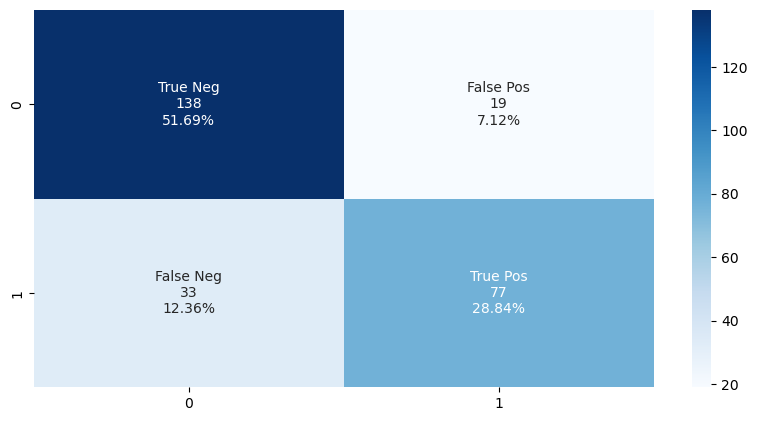

In [120]:
# #
# # TRAIN TEST SPLIT PREP
# #
feature_cols = [
   'Pclass', 'is_female', 
   'Embarked_C', 'Embarked_Q', 'Embarked_S', 
   'is_family', 'is_parent', 'is_child', 
   'is_age_master', 'is_age_mister', 'is_age_miss', 'is_age_misses'
   ]
X = train_df[feature_cols]
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# #
# # MODELING
# #
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
y_pred = model.predict(X_test)

# #
# # METRIC REPORTING
# #
cnf_matrix = confusion_matrix(y_test, y_pred)
# print(cnf_matrix)
print("Recall:", classification_report(y_test, y_pred))
plt.figure(figsize=(10,5),dpi=100)
confusion_heat_map(cnf_matrix)

In [116]:
no_dummy_df = read_clean_titanic('./data/train.csv', use_dummies=False)

In [117]:
df = no_dummy_df
display(survival_in_feature_group(df, 'Embarked'))
display(survival_in_feature_group(df, 'Sex'))

,Embarked,total,survived_count,survived_perc
0,C,168,93,55.36
1,Q,77,30,38.96
2,S,644,217,33.70


,Sex,total,survived_count,survived_perc
0,female,312,231,74.04
1,male,577,109,18.89
